# Pneumonia Data Wrangling & EDA

## Import Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Import Data & Label

In [2]:
# Create function to import images from folders
img_size = 150
def load_images(path):
    images = []
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            images.append(resized_arr)
        except Exception as e:
            print(e)
    return images

In [3]:
# Import training data
train_normal = load_images('Raw_Data/train/NORMAL')
train_pneumonia = load_images('Raw_Data/train/PNEUMONIA')

# Convert lists of images into dataframes and add labels
df_train_normal = pd.DataFrame({'Image':train_normal, 'Label':'Normal'})
df_train_pneumonia = pd.DataFrame({'Image':train_pneumonia, 'Label':'Pneumonia'})

# Combine normal and pneumonia dataframes
df_train = pd.concat([df_train_normal, df_train_pneumonia]).reset_index(drop=True)

In [4]:
# Import test data
test_normal = load_images('Raw_Data/test/NORMAL')
test_pneumonia = load_images('Raw_Data/test/PNEUMONIA')

# Convert lists of images into dataframes and add labels
df_test_normal = pd.DataFrame({'Image':test_normal, 'Label':'Normal'})
df_test_pneumonia = pd.DataFrame({'Image':test_pneumonia, 'Label':'Pneumonia'})

# Combine normal and pneumonia dataframes
df_test = pd.concat([df_test_normal, df_test_pneumonia]).reset_index(drop=True)

In [5]:
# Import validation data
val_normal = load_images('Raw_Data/val/NORMAL')
val_pneumonia = load_images('Raw_Data/val/PNEUMONIA')

# Convert lists of images into dataframes and add labels
df_val_normal = pd.DataFrame({'Image':val_normal, 'Label':'Normal'})
df_val_pneumonia = pd.DataFrame({'Image':val_pneumonia, 'Label':'Pneumonia'})

# Combine normal and pneumonia dataframes
df_val = pd.concat([df_val_normal, df_val_pneumonia]).reset_index(drop=True)

## Save Labelled Data

In [6]:
df_train.to_csv('Clean_Data/training_data.csv')
df_test.to_csv('Clean_Data/testing_data.csv')
df_val.to_csv('Clean_Data/validation_data.csv')

## Explore Data

In [7]:
print(df_train.head())
print(df_test.head())
print(df_val.head())

                                               Image   Label
0  [[29, 27, 30, 28, 27, 26, 28, 29, 30, 29, 28, ...  Normal
1  [[107, 58, 53, 47, 50, 81, 84, 83, 97, 93, 106...  Normal
2  [[44, 57, 69, 75, 83, 89, 93, 96, 104, 106, 17...  Normal
3  [[0, 10, 17, 27, 41, 44, 49, 55, 60, 67, 69, 7...  Normal
4  [[114, 116, 122, 123, 128, 132, 190, 182, 167,...  Normal
                                               Image   Label
0  [[25, 24, 21, 19, 19, 21, 20, 21, 20, 20, 20, ...  Normal
1  [[1, 3, 3, 6, 4, 6, 6, 5, 6, 6, 7, 5, 7, 6, 8,...  Normal
2  [[68, 80, 58, 54, 56, 49, 42, 32, 21, 0, 0, 1,...  Normal
3  [[0, 0, 0, 0, 0, 1, 12, 12, 12, 12, 12, 12, 11...  Normal
4  [[13, 23, 52, 74, 90, 99, 111, 105, 108, 113, ...  Normal
                                               Image   Label
0  [[6, 23, 32, 30, 40, 37, 44, 43, 40, 38, 39, 4...  Normal
1  [[1, 3, 20, 16, 13, 37, 41, 41, 51, 55, 60, 61...  Normal
2  [[2, 104, 88, 98, 105, 117, 117, 126, 122, 126...  Normal
3  [[24, 2, 68, 44, 25, 

In [8]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(5216, 2)
(624, 2)
(16, 2)


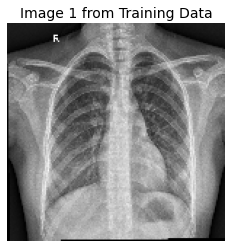

X-Ray Results:  Normal


In [9]:
_ = plt.imshow(df_train['Image'][0], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 1 from Training Data', fontsize=14)
plt.show()
print("X-Ray Results: ", df_train['Label'][0])

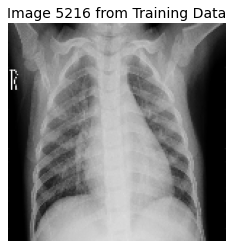

X-Ray Results:  Pneumonia


In [10]:
_ = plt.imshow(df_train['Image'][5215], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 5216 from Training Data', fontsize=14)
plt.show()
print("X-Ray Results: ", df_train['Label'][5215])

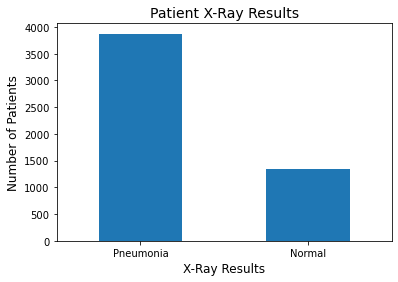

In [11]:
_ = df_train['Label'].value_counts().plot(kind='bar')
_ = plt.xticks(rotation=0)
_ = plt.title('Patient X-Ray Results', fontsize=14)
_ = plt.xlabel('X-Ray Results', fontsize=12)
_ = plt.ylabel('Number of Patients', fontsize=12)